<a href="https://colab.research.google.com/github/lapshinaaa/applied-statistics-tasks/blob/main/AS3_Probability_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Statistical Tests about Probability
</center>

## General info and helpful links

- [T-tests](https://youtu.be/PLrHmjw0EG0)
- [Welch's Test](https://youtu.be/S52tY1h8nBE)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

 ### Task 1: Exam

<center>
<img src="https://github.com/FUlyankin/yet_another_matstat_course/blob/main/hw_2024/images/exam.jpeg?raw=true" width="400">
</center>
<br>


У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [2]:
df = pd.read_csv('students_exam.csv')
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


__а)__ __[4 балла]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college).

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [3]:
# diving into two groups of students: with and without higher educatiton
higher_ed = ["associate's degree", "bachelor's degree", "master's degree"]
no_higher_ed = ["high school", "some high school", "some college"]

higher_group = df[df['parental level of education'].isin(higher_ed)]['math score'] # first group with higher education
no_higher_group = df[df['parental level of education'].isin(no_higher_ed)]['math score'] # no higher ed

Let us check the distribution of our data to choose the most suitable test:

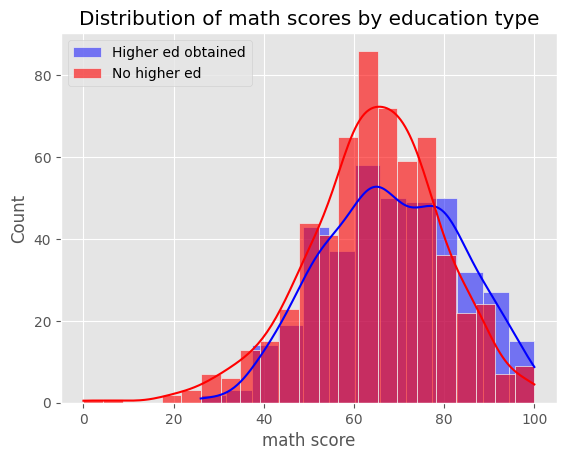

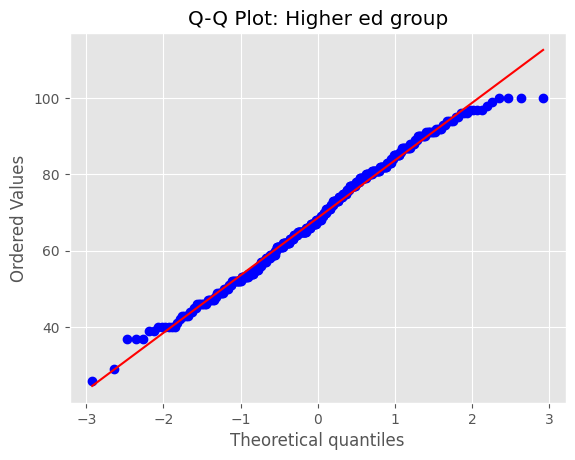

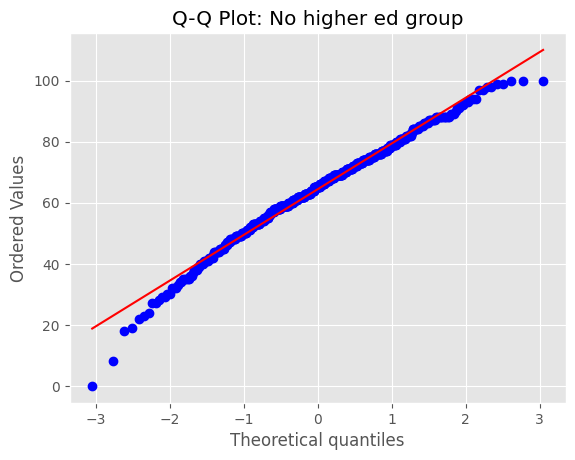

In [5]:
sns.histplot(higher_group, kde=True, color="blue", label="Higher ed obtained")
sns.histplot(no_higher_group, kde=True, color="red", label="No higher ed", alpha=0.6)
plt.legend()
plt.title("Distribution of math scores by education type")
plt.show()

sts.probplot(higher_group, dist="norm", plot=plt)
plt.title("Q-Q Plot: Higher ed group")
plt.show()

sts.probplot(no_higher_group, dist="norm", plot=plt)
plt.title("Q-Q Plot: No higher ed group")
plt.show()

I chose the **two-sample independent t-test** because we are comparing the means of two independent groups: students with higher education and students without it. Each student contributes one independent observation, so the groups are independent of one another.

The assumptions of the t-test are:
 1. Independence of observations — each student’s test score is independent of others. This is satisfied by design of the dataset.
 2. Approximately normal distribution of the outcome within each group — the t-test is fairly robust to deviations from normality for large samples, which is the case here.

Given the sample size and the fact that I am going to use scipy.stats.ttest_ind (which defaults to Welch’s correction if specified), these assumptions are reasonably satisfied for our data

In [7]:
t_test, p_value = sts.ttest_ind(higher_group, no_higher_group, alternative='greater')

print("а) Math scores for two groups of parental education:")
print(f"t-test: {t_test:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: students with higher education do intend to score higher in math.")
else:
    print("Fail to reject H0: there is no statistically significant evidence that students with higher education score higher in math.")

а) Math scores for two groups of parental education:
t-test: 4.3111, p-value: 0.0000
Reject H0: students with higher education do intend to score higher in math.


__б)__ __[3 балла]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`?

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [4]:
reading_scores = df['reading score']
math_scores = df['math score']

t_stat, p_value = sts.ttest_rel(reading_scores, math_scores)
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: average math and reading scores differ significantly.")
else:
    print("Fail to reject H0: no significant difference between math and reading scores.")

t-statistic: 10.8162, p-value: 0.0000
Reject H0: average math and reading scores differ significantly.


For this experiment I chose a two-sample paired t-test. The key nuance is that the samples are paired: each student contributes both a math score and a reading score. This creates n pairs of observations, where n is the number of students. Since the two scores come from the same individuals, the samples are not independent, and therefore the paired t-test is the appropriate choice rather than the independent two-sample test.